# Important Information on Interactivity

After installing the prerequisite packages, to enable the dynamical content in this Jupyter notebook, please configure your Jupyter client *in termonal* using 

```
jupyter nbextension enable --py --sys-prefix ipyleaflet
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

# Init

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import shapefile
import random
from ipywidgets import HTML

pi = np.pi
import rasterio

from scipy.interpolate import RegularGridInterpolator as RPI

plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

Palette = 'magma'
CycPalette = 'Greys'
DivPalette = 'RdYlGn'

FigSize = (20,12)
FigSizeMono = (20,6)
DPI = 72

# Distance on a sphere

def SphericalDistance(PtA,PtB):
    
    PtALat = PtA[0] * pi / 180
    PtALon = PtA[1] * pi / 180
    
    PtBLat = PtB[0] * pi / 180
    PtBLon = PtB[1] * pi / 180
                
    rTerra = 6371009 # metres
                 
    return 2*rTerra*np.arcsin(np.sqrt(np.sin((PtALat-PtBLat)/2)**2+np.cos(PtALat)*np.cos(PtBLat)*np.sin((PtALon-PtBLon)/2)**2))


# Map A User Location Onto Our Graph
def FindNearest(Points,Location):
    
    IPoints = np.array(Points) # Force to be n x 2 array
   
    Dist = (IPoints[:,0]-Location[0])**2 + (IPoints[:,1]-Location[1])**2
    
    Loc = np.where(Dist == np.min(Dist))[0] # In case there's a tie, pick the first one!

    return IPoints[Loc,:][0]

# Aux File IO
from json import dumps

def ShapeToJson(Shapefile):
    
        # read shape
    reader = shapefile.Reader(Shapefile)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]
    buffer = []
    
    for sr in reader.shapeRecords():
       atr = dict(zip(field_names, sr.record))
       geom = sr.shape.__geo_interface__
       buffer.append(dict(type="Feature", geometry=geom, properties=atr)) 

    # write the GeoJSON

    geojson = open(f"{Shapefile}_converted.json", "w+")
    geojson.write(dumps({"type": "FeatureCollection","features": buffer}, indent=2) + "\n")
    geojson.close()

# Our Interactive Map

In [2]:
ShapeToJson('./Street/Final')

ShapeToJson('./CroppedRiver/0100')
ShapeToJson('./CroppedRiver/0250')
ShapeToJson('./CroppedRiver/0500')
ShapeToJson('./CroppedRiver/1000')
ShapeToJson('./CroppedRiver/1500')
ShapeToJson('./CroppedRiver/2000')

In [3]:
import json
with open('./Street/Final_converted.json', 'r') as f:
    StreetData = json.load(f)
 
Rivers = []
with open('./CroppedRiver/0100_converted.json', 'r') as f:
    R0100 = json.load(f)

with open('./CroppedRiver/0250_converted.json', 'r') as f:
    R0250 = json.load(f)
    
with open('./CroppedRiver/0500_converted.json', 'r') as f:
    R0500 = json.load(f)
    
with open('./CroppedRiver/1000_converted.json', 'r') as f:
    R1000 = json.load(f)
    
with open('./CroppedRiver/1500_converted.json', 'r') as f:
    R1500 = json.load(f)
    
with open('./CroppedRiver/2000_converted.json', 'r') as f:
    R2000 = json.load(f)
    

In [4]:
st = shapefile.Reader("./Street/Final")
tL = st.shapes()
figlim = st.bbox

## Potential Refuge Points

In [5]:
ListInterest = [[-37.89761413273187, 176.7415237426758], 
                [-37.968831415745775, 176.7470169067383],
                [-38.02294285011436, 176.70478820800784],
                [-37.9750562620536, 176.85756683349612]] 

Icons = ['./Artworks/Hospital.png','./Artworks/CDef.png','./Artworks/Park.png','./Artworks/Ambulance.png']


Hospitals = [[-38.1358,176.2488], 
                [-37.9658, 176.9811],
                [-37.7146, 176.1567]] 


HosIcon = './Artworks/Hospital.png'


AmbStations = [
[-37.978518999999899,176.827161],
[-38.082213,176.710321,],
[-38.45432,176.702565],
[-37.675112,176.226561],
[-37.782038,176.327501],
[-38.140656,176.243475,],
[-37.976762999999899,176.982759],    
[-37.70796,176.153648]]



AmbIcon = './Artworks/Ambulance.png'



Colors = plt.cm.YlOrRd(np.linspace(0,1,6))
CHex = []
for color in Colors:
    
    colorT = (int(color[0]*255),int(color[1]*255),int(color[2]*255))
    
    CHex.append('#%02x%02x%02x' % colorT)

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333]


<ipython-input-6-6c7664e9f1e2>:13: UserWarning: Use the colorbar set_ticks() method instead.
  cb.ax.set_xticks(Labels)
<ipython-input-6-6c7664e9f1e2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_xticklabels(['100m','250m','500m','1000m','1500m','2000m'])


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x00d\x08\x06\x00\x00\x00\x159\x1a\xd…

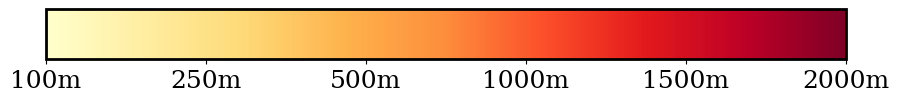

In [6]:
a = np.array([[0,1]])
plt.figure(figsize=(10, 1))
img = plt.imshow(a, cmap='YlOrRd')

plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.35, 0.8, 0.5])
cb = plt.colorbar(orientation="horizontal", cax=cax)

Labels = np.arange(6)/6

print(Labels)

cb.ax.set_xticks(Labels)
cb.ax.set_xticklabels(['100m','250m','500m','1000m','1500m','2000m'])

plt.savefig("colorbar.png",transparent=True)

file = open("colorbar.png", "rb")
image = file.read()

Legend = widgets.Image(
    value=image,
    format='png',
    width = '400px',
)

display(Legend)

## Loading Satellite Data

saved ./Water/16W
saved ./Water/17W


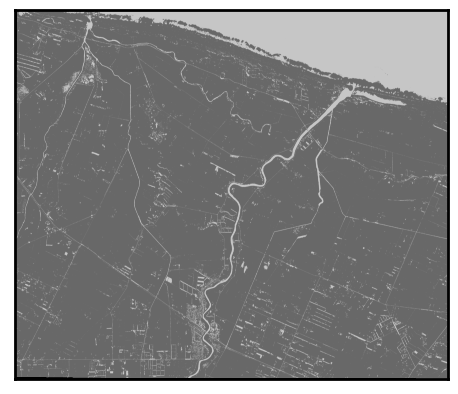

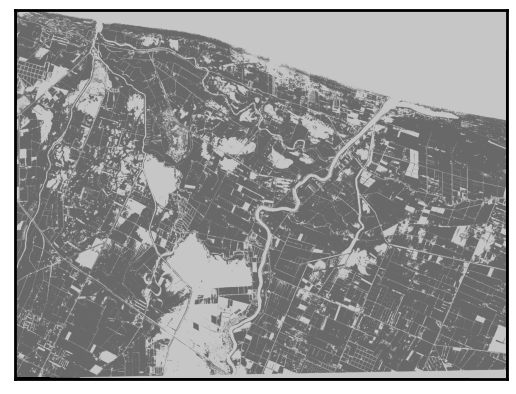

In [7]:
from PIL import Image
import numpy as np

def ImageProcess(name):
    fig = plt.figure(frameon=False)
    im = Image.open(f"{name}.bmp")
    p = np.array(im)

    plt.imshow(p,vmin = 0, vmax = 3, cmap = 'Greys')

    plt.xticks([])
    plt.yticks([])
    fig.savefig(f'{name}.png', bbox_inches='tight', pad_inches=0)
    print('saved',name)

ImageProcess('./Water/16W')
ImageProcess('./Water/17W')

Bound16W = ((-37.990785378,176.762050711),(-37.887377082,176.915706813))
Bound17W = ((-37.978509773,176.762090349),(-37.887377082,176.915684068))

# Interactive Map

In [9]:
import osgeo
import pyproj
import json
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, CircleMarker, Popup, GeoJSON, Icon, MarkerCluster, Rectangle, LayerGroup, ImageOverlay

UserL = 2
MBoxL = 3

center=(-37.941760730553966, 176.79370880126953)

m = Map(
    center=center,
    zoom=11,
    basemap=basemaps.CartoDB.Positron
    )

    #crs = {'name': 'EPSG4326', 'custom': False}

m.layout.width = '1024px'
m.layout.height = '768px'
m.layout.arrange= 'center'

IntMark = []
for Location in Hospitals:
    
    icon = Icon(icon_url=HosIcon, icon_size=[40, 40], icon_anchor=[20,20])
    mark = Marker(location=Location, icon=icon, draggable = False)
    IntMark.append(mark)
    
for Location in AmbStations:
    
    icon = Icon(icon_url=AmbIcon, icon_size=[40, 40], icon_anchor=[20,20])
    mark = Marker(location=Location, icon=icon, draggable = False)
    IntMark.append(mark)
       

IntCluster = MarkerCluster(markers=tuple(IntMark))

m.add_layer(IntCluster)

marker = Marker(location=Location, draggable=False, visible = False)

m.add_layer(marker)

def handle_click(**kwargs):
    print(f"Hospital Location (Lat / Lon): {kwargs['coordinates']}")
marker.on_click(handle_click)

# User Event init
Active = False
UserMarker = marker
messageBox = marker
def handle_map_interaction(**kwargs):
   # markerU = CircleMarker(location=(0,0), draggable=True, visible = False)
   # m.add_layer(markerU)
    #m.add_layer(markerU)
    #print(kwargs)

    if kwargs['type'] == 'click':

        NLoc =  kwargs['coordinates']
        
        global UserMarker, Active, messageBox  

        markerU = CircleMarker(location=NLoc, draggable=True, color = '#454545')

        if Active == True:
            m.remove_layer(UserMarker)
            m.remove_layer(messageBox)
           
        m.add_layer(markerU)

            
        message = HTML()
        
        KeyLocation = FindNearest(Hospitals,NLoc)
        
        markerN = CircleMarker(location=KeyLocation.tolist(), draggable=True, color = '#ff0202',radius = 28 )
        
        m.add_layer(markerN)
        
        D = SphericalDistance(KeyLocation,NLoc)
        
        message.value = f'Distance to Nearest Hospital: {D:.5g}m<br>This is about {D/1.2/60:.0f} minutes on foot.'
        
        popup = Popup(
        location=NLoc,
        close_button=False,
        auto_close=False,
        child = message,
        close_on_escape_key=True
        )
        m.add_layer(popup)

        #markerU.popup = message
        
        UserMarker = markerU
        Active = True
        messageBox = popup
     
m.on_interaction(handle_map_interaction)

S = GeoJSON(data = StreetData,
            style={'opacity': 1,
                   'fillOpacity': 1, 'weight': 1, 'color': 'black'})

m.add_layer(S)


# River buffer zone
RiverOL = [] 

S = GeoJSON(data = R2000,
            style={'opacity': 1,
                   'fillOpacity': 0.3, 'weight': 1, 'color': CHex[0]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

S = GeoJSON(data = R1500,
            style={'opacity': 1,
                   'fillOpacity': 0.25, 'weight': 1, 'color': CHex[1]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

S = GeoJSON(data = R1000,
            style={'opacity': 1,
                   'fillOpacity': 0.2, 'weight': 1, 'color': CHex[2]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

S = GeoJSON(data = R0500,
            style={'opacity': 1,
                   'fillOpacity': 0.15, 'weight': 1, 'color': CHex[3]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

S = GeoJSON(data = R0250,
            style={'opacity': 1,
                   'fillOpacity': 0.1, 'weight': 1, 'color': CHex[4]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

S = GeoJSON(data = R0100,
            style={'opacity': 1,
                   'fillOpacity': 0.1, 'weight': 1, 'color': CHex[5]},hover_style = {'fillOpacity':0.7})

RiverOL.append(S)

RiverCluster = MarkerCluster(markers=tuple(RiverOL))


from ipyleaflet import Map, basemaps, WidgetControl
from ipywidgets import IntSlider, ColorPicker, jslink

zoom_slider = IntSlider(description='Zoom level:', min=11, max=15, value=11)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

button = widgets.Button(
    description='Reset',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

Riverbutton = widgets.Button(
    description='Plot River Flood Zones',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

Riverslider = IntSlider(description='Buffer Size', min=0, max=6, value=3)

widget_control5 = WidgetControl(widget=Riverslider, position='topright')

map_select = widgets.ToggleButtons(
    options=['Flood', 'No Flood', 'Disable Overlay'],
    value='Flood',
    description='Overlay:',
    disabled=False,
)

widget_control3 = WidgetControl(widget=Riverbutton, position='topright')
m.add_control(widget_control3)

widget_control4 = WidgetControl(widget=map_select, position='bottomright')

def Map_reset(b):
    global m
    print('Button pressed!')
    m.clear_layers()

LegendW = WidgetControl(widget=Legend, position='bottomleft')
m.add_control(LegendW)

RiversActive = False
def RiverButtonClick(b):
    global RiversActive

    if RiversActive:
        m.remove_layer(RiverCluster)
        m.remove_control(LegendW)
        RiversActive = False
        
        
    else:
        m.add_layer(RiverCluster)
        RiversActive = True


button.on_click(Map_reset)

Riverbutton.on_click(RiverButtonClick)

image17 = ImageOverlay(
    url="./Water/17W.png",
    # url='../06Q1fSz.png',
    bounds=Bound17W)

image16 = ImageOverlay(
    url="./Water/16W.png",
    # url='../06Q1fSz.png',
    bounds=Bound16W)

output2 = widgets.Output()
display(map_select, output2)

def on_value_change(change):
    with output2:
        print(change['new'])
        
        if map_select.value == 'Flood':
            
            OImage = image17 
            m.add_layer(OImage)
    
        if map_select.value == 'No Flood':
            OImage = image16
            m.add_layer(OImage)

        if map_select.value == 'Disable Overlay':
            m.remove_layer(OImage)

map_select.observe(on_value_change, names='value')

m

ToggleButtons(description='Overlay:', options=('Flood', 'No Flood', 'Disable Overlay'), value='Flood')

Output()

Map(center=[-37.941760730553966, 176.79370880126953], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [10]:
m.save('TestMap.html', title='My Map')

In [ ]:
int_range = map_select
output2 = widgets.Output()
display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

int_range.observe(on_value_change, names='value')

# QGIS-Powered Graph Theory

In [ ]:
st = shapefile.Reader("./Street/Final")

tL = st.shapes()

len(st)
len(tL)

In [ ]:
PointSet = []
figlim = st.bbox

print(figlim)

fig = plt.figure()
ax = fig.add_subplot(111)

#plt.xlim(figlim[0],figlim[1])
#plt.ylim(figlim[2],figlim[3])

#ax.set_aspect = 'equal'

ax.grid()

for i in range(len(st)):

    PointSet += tL[i].points
    
    PAR = np.array(tL[i].points)

    PAR = PAR.reshape([-1,2])

    ax.plot(PAR[:,0],PAR[:,1])

In [ ]:
seen = set()
uniq = []

Intersections = PointSet.copy()

for x in PointSet:
    if x not in seen:
        uniq.append(x)
        seen.add(x)
        
for x in uniq:  
    Intersections.remove(x)

fig = plt.figure()
#ax = fig.add_subplot(111)

#plt.xlim(figlim[0],figlim[1])
#plt.ylim(figlim[2],figlim[3])

ax.set_aspect = 'equal'

ax.grid()


seenPoints = np.array(Intersections)
print('Done!')

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)


plt.scatter(seenPoints[:,0],seenPoints[:,1],color = 'k', s = 10)

for i in range(len(st)):
    
    PAR = np.array(tL[i].points)

    PAR = PAR.reshape([-1,2])

    ax.plot(PAR[:,0],PAR[:,1], color = '#16ff03')

ax.set_xlabel('West - East (Degrees)')

ax.set_ylabel('South - North (Degrees)')


## Graph Theory Stuff

In [ ]:
StreetList = []
for i in range(len(st)):
    StreetList.append(tL[i].points)

# Risk Array

In [ ]:
st = shapefile.Reader("./Street/Final")
tL = st.shapes()
figlim = st.bbox
Resol = 500

print(figlim)
Hor = np.linspace(figlim[0],figlim[2],Resol)
Ver = np.linspace(figlim[1],figlim[3],Resol)

xL,yL = np.meshgrid(Hor,Ver,indexing = 'xy', sparse = True)

DataGrid = np.sin(0.00001*xL**3+0.0025*xL*yL)

plt.imshow(DataGrid, extent = (figlim[0],figlim[2],figlim[1],figlim[3]))

plt.xlim(Hor[0],Hor[-1])
plt.ylim(Ver[0],Ver[-1])

InInterp = RPI((Hor,Ver),DataGrid,bounds_error = False, fill_value = 0)


plt.scatter([176.7],[-38], color = 'k')
print(InInterp([176.7,-38]))


plt.colorbar()

# x / Horizontal
CoastLon = [176.92748397588736,176.77053451538086,176.63892656564715,176.5040194988251]

# y / Vertical
CoastLat = [-37.917510253971166,-37.88795988297887,-37.84579317265323, -37.77446739882399]

CoastCubic = np.polyfit(CoastLon,CoastLat,deg = 1)

def CoastDelimit(DataGrid,xL,yL):
    
    mask = np.polyval(CoastCubic,xL) < yL
    
    return DataGrid*mask
    
DGCC = CoastDelimit(DataGrid,xL,yL)

plt.imshow(DGCC, extent = (figlim[0],figlim[2],figlim[1],figlim[3]))

plt.scatter(CoastLon,CoastLat)